In [1]:
import pandas as pd
import numpy as np
import pandas_profiling

In [2]:
data=pd.read_csv('tableau_project.csv')
data.head()

,Unnamed: 0,journey_id,vehicle_type_id,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,...,price_distance,price_duration,distance,duration,source,rider_waiting_time,driver_waiting_time,price_supplements,discount,rating
0,0,93e6d216088af74c32183283d4bb2953,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 11:08:59,19.431363,-99.195362,2017-12-16 11:37:32,19.406438,-99.175260,...,"5,204",0,"7,943","1,058",Android,590,48,662,0,9.0
1,1,444b084ec64244919afadfba879876a3,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 11:06:16,19.431567,-99.195368,2017-12-16 11:07:21,NaN,NaN,...,0,0,0,0,iPhone,NaN,NaN,0,0,9.0
2,2,dbcc57f4e7606a71c74c6e4666a977a4,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 22:58:37,19.422052,-99.174499,2017-11-24 23:27:05,19.438666,-99.180821,...,"3,552",0,"3,054",689,Android,923,4,0,0,10.0
3,3,1ffe9a24033847148c683574985df56c,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-12-16 09:17:08,19.433119,-99.154844,2017-12-16 09:17:30,19.290148,-99.144407,...,0,0,0,0,iPhone,NaN,NaN,0,0,9.0
4,4,fb1ef7d070724482a33be41f27737ea5,077866c3fd1a75f51ca7f8eae166ae32,asap,2017-11-24 18:11:00,19.440996,-99.183581,2017-11-24 18:31:31,19.422815,-99.174865,...,"2,974",12,"2,859",887,iPhone,329,36,0,0,8.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 22 columns):
Unnamed: 0             3864 non-null int64
journey_id             3864 non-null object
vehicle_type_id        3864 non-null object
start_type             3864 non-null object
start_at               3864 non-null object
start_lat              3864 non-null float64
start_lon              3864 non-null float64
end_at                 3864 non-null object
end_lat                3807 non-null float64
end_lon                3807 non-null float64
end_state              3864 non-null object
price                  3844 non-null object
price_distance         2812 non-null object
price_duration         2812 non-null object
distance               3844 non-null object
duration               3844 non-null object
source                 3864 non-null object
rider_waiting_time     2733 non-null object
driver_waiting_time    2685 non-null object
price_supplements      3864 non-null object
discount  

In [4]:
data.describe()

,Unnamed: 0,start_lat,start_lon,end_lat,end_lon,rating
count,3864.000000,3864.000000,3864.000000,3807.000000,3807.000000,3864.000000
mean,1931.500000,19.412159,-99.195443,19.410835,-99.197221,8.289596
std,1115.585048,0.028146,0.040832,0.030001,0.044896,1.265744
min,0.000000,19.290513,-99.288274,19.196463,-99.655665,4.000000
25%,965.750000,19.405320,-99.207814,19.379486,-99.253980,8.000000
50%,1931.500000,19.422749,-99.175834,19.422749,-99.178435,9.000000
75%,2897.250000,19.426613,-99.170483,19.429759,-99.171955,9.000000
max,3863.000000,19.513544,-99.051114,19.517451,-99.048817,10.000000


In [5]:
data.columns

Index(['Unnamed: 0', 'journey_id', 'vehicle_type_id', 'start_type', 'start_at',
       'start_lat', 'start_lon', 'end_at', 'end_lat', 'end_lon', 'end_state',
       'price', 'price_distance', 'price_duration', 'distance', 'duration',
       'source', 'rider_waiting_time', 'driver_waiting_time',
       'price_supplements', 'discount', 'rating'],
      dtype='object')

In [6]:
report = pandas_profiling.ProfileReport(data)
report

Number of variables,22
Number of observations,3864
Total Missing (%),5.4%
Total size in memory,664.2 KiB
Average record size in memory,176.0 B
Numeric,6
Categorical,14
Boolean,0
Date,0
Text (Unique),2
Rejected,0


In [7]:
data['vehicle_type_id'].unique()

array(['077866c3fd1a75f51ca7f8eae166ae32',
       '21620ea5749f2e0679a8c72c7fbafb9e'], dtype=object)

/usr/local/lib/python3.5/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.5/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


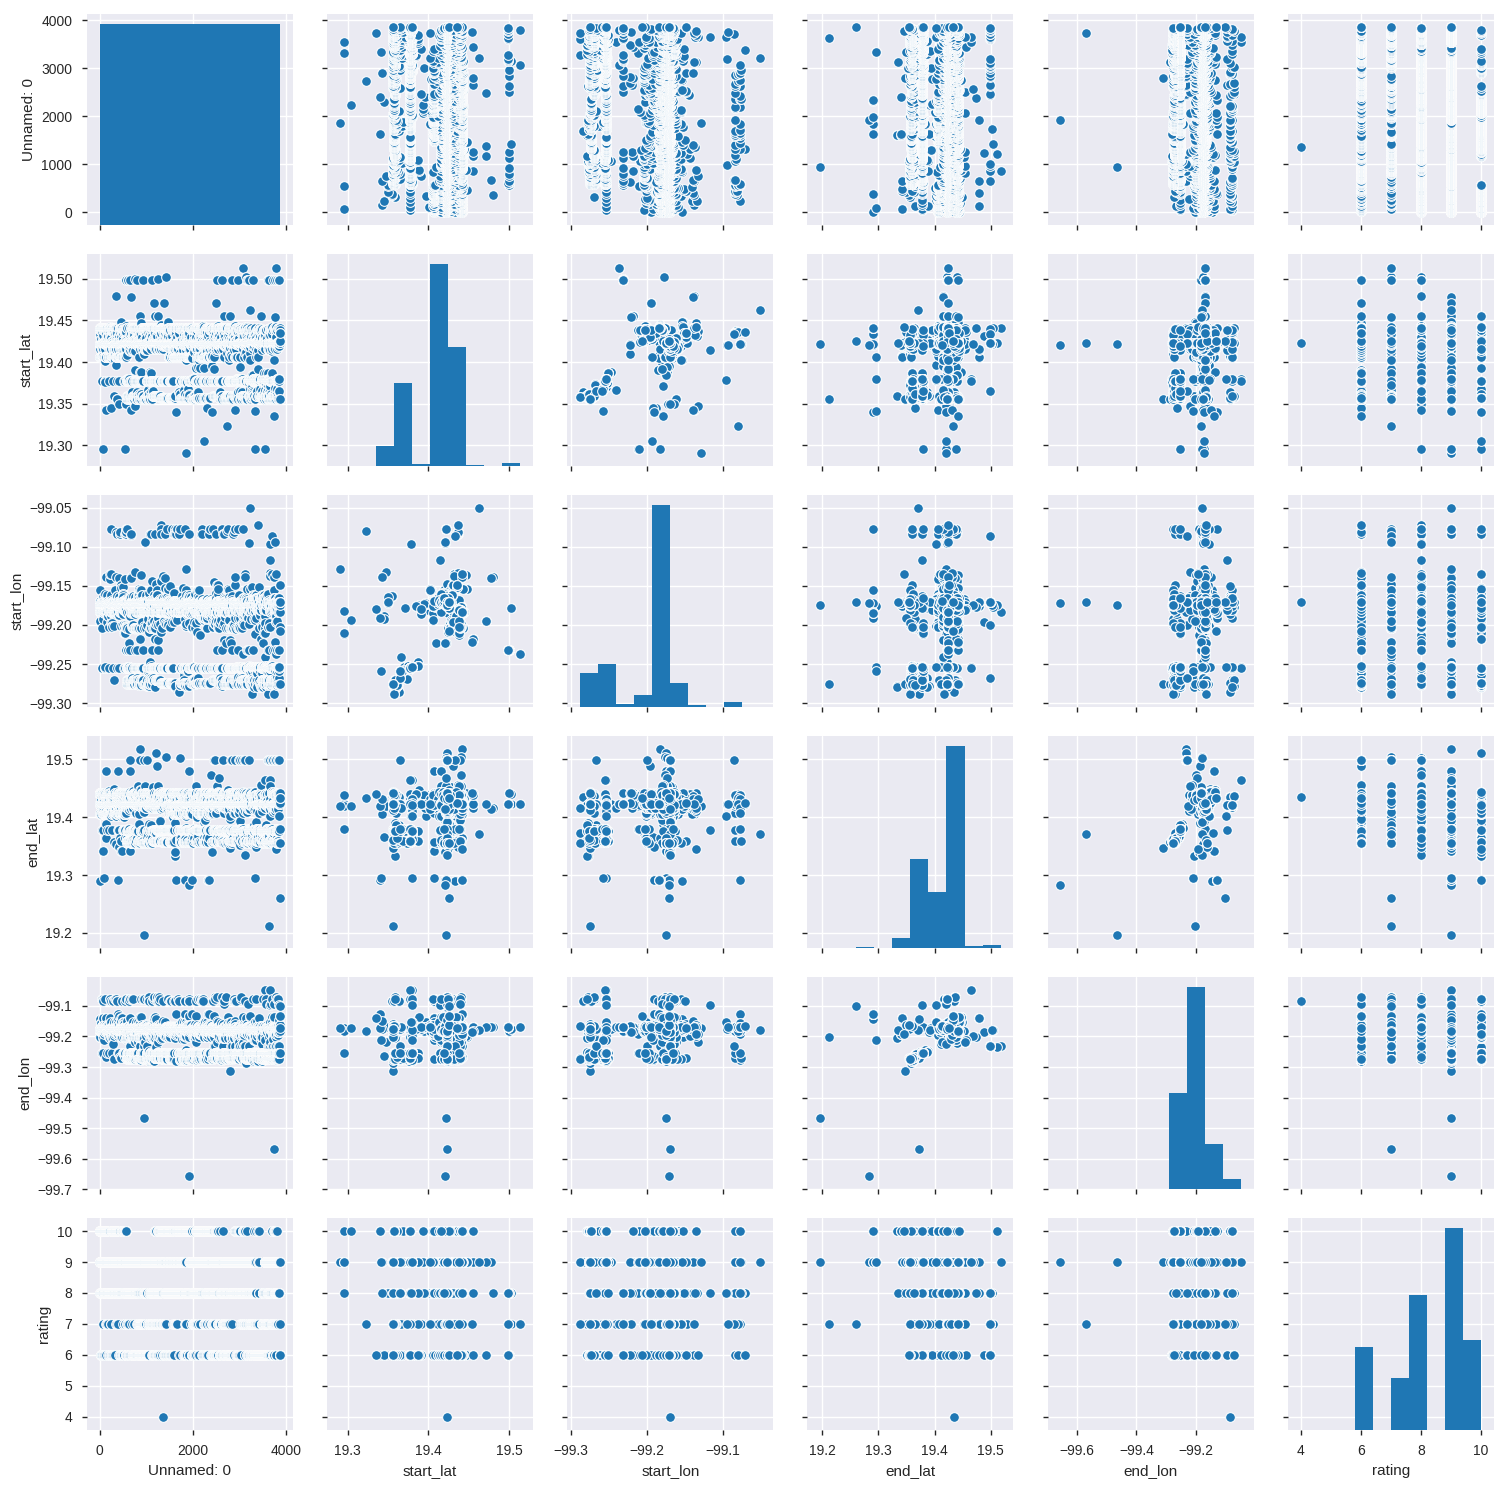

In [8]:
import seaborn as sns
g = sns.pairplot(data)

In [9]:
def fuera_comas(comas):
    return float(comas.replace(',','.'))

In [16]:
#data['price'] = data['price'].str.replace(',','.')
fueracomas=['price','distance','duration']
for x in fueracomas:
    data[x]=data[x].str.replace(',','.')
data['distance'].head()
#data['price'] = data['price'].str.replace(',','.')

0    7.943
1        0
2    3.054
3        0
4    2.859
Name: distance, dtype: object

In [17]:
data['duration'].head()

0    1.058
1        0
2      689
3        0
4      887
Name: duration, dtype: object

In [19]:
tipos=['price','distance','duration']
for y in tipos:
    data[y]=data[y].astype('float') 
data['distance'].head()

0    7.943
1    0.000
2    3.054
3    0.000
4    2.859
Name: distance, dtype: float64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 22 columns):
Unnamed: 0             3864 non-null int64
journey_id             3864 non-null object
vehicle_type_id        3864 non-null object
start_type             3864 non-null object
start_at               3864 non-null object
start_lat              3864 non-null float64
start_lon              3864 non-null float64
end_at                 3864 non-null object
end_lat                3807 non-null float64
end_lon                3807 non-null float64
end_state              3864 non-null object
price                  3844 non-null float64
price_distance         2812 non-null object
price_duration         2812 non-null object
distance               3844 non-null float64
duration               3844 non-null float64
source                 3864 non-null object
rider_waiting_time     2733 non-null object
driver_waiting_time    2685 non-null object
price_supplements      3864 non-null object
discoun

In [ ]:
#data = pd.notnull(data["price"]) 
data = data[pd.notnull(data['price'])]

In [ ]:
data.info()

In [ ]:
data['distance'].head()